# 2 血肿周围水肿的发生及进展建模，并探索治疗干预和水肿进展的关联关系

## a问：请根据“表2”前100个患者（sub001至sub100）的水肿体积（ED_volume）和重复检查时间点，构建一条全体患者水肿体积随时间进展曲线（x轴：发病至影像检查时间，y轴：水肿体积，y=f(x)），计算前100个患者（sub001至sub100）真实值和所拟合曲线之间存在的残差。

*Tips:通过多种方式(线性 指数 对数 时序arima)拟合ED_volume与发病到每次检查时间间隔并计算残差。对比不同的拟合结果，选择MSE最小的拟合方式。*

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", module="matplotlib")
#显示所有行列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 选取需要的列 按“入院首次检查流水号"拼成一个大表 保留前100行
df1 = pd.read_excel("表1-患者列表及临床信息.xlsx")
df2 = pd.read_excel("表2-患者影像信息血肿及水肿的体积及位置.xlsx")
df3 = pd.read_excel("附表1-检索表格-流水号vs时间New.xlsx")

df1 = pd.concat([df1["入院首次检查流水号"],df1["发病到首次影像检查时间间隔"]],axis=1)
df2 = pd.concat([df2["入院首次检查流水号"],df2["ED_volume0"],df2["ED_volume1"],df2["ED_volume2"],df2["ED_volume3"],df2["ED_volume4"],df2["ED_volume5"],df2["ED_volume6"],df2["ED_volume7"],df2["ED_volume8"]],axis=1)
df3 = pd.concat([df3["入院首次检查流水号"],df3["入院首次检查时间点"],df3["随访1时间点"],df3["随访2时间点"],df3["随访3时间点"],df3["随访4时间点"],df3["随访5时间点"],df3["随访6时间点"],df3["随访7时间点"],df3["随访8时间点"]],axis=1)

df=pd.merge(df1,df2,on=['入院首次检查流水号'])
df=pd.merge(df,df3,on=['入院首次检查流水号'])
df=df.head(100)
df

,入院首次检查流水号,发病到首次影像检查时间间隔,ED_volume0,ED_volume1,ED_volume2,ED_volume3,ED_volume4,ED_volume5,ED_volume6,ED_volume7,ED_volume8,入院首次检查时间点,随访1时间点,随访2时间点,随访3时间点,随访4时间点,随访5时间点,随访6时间点,随访7时间点,随访8时间点
0,20161212002136,2.50,48919,57898.0,81747.0,107793.0,126558.0,NaN,NaN,NaN,NaN,2016-12-12 23:32:54,2016-12-13 05:19:00,2016-12-18 09:09:24,2016-12-23 16:47:09,2016-12-30 14:35:12,NaT,NaT,NaT,NaT
1,20160406002131,3.00,23526,23390.0,28415.0,34868.0,0.0,NaN,NaN,NaN,NaN,2016-04-06 21:21:03,2016-04-07 09:16:27,2016-04-09 15:34:22,2016-04-25 10:22:02,2016-05-23 09:32:34,NaT,NaT,NaT,NaT
2,20160413000006,2.00,32621,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-13 01:18:17,2016-04-13 08:49:38,2016-04-14 14:54:02,NaT,NaT,NaT,NaT,NaT,NaT
3,20160413000006,2.00,32621,41292.0,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-13 01:18:17,2016-04-13 08:49:38,2016-04-14 14:54:02,NaT,NaT,NaT,NaT,NaT,NaT
4,20161215001667,1.00,22191,18956.0,9540.0,5204.0,NaN,NaN,NaN,NaN,NaN,2016-12-15 22:53:41,2016-12-16 14:52:08,2016-12-19 09:44:24,2016-12-25 09:23:45,NaT,NaT,NaT,NaT,NaT
5,20161215001667,1.00,22191,18956.0,9540.0,5204.0,NaN,NaN,NaN,NaN,NaN,2016-12-15 22:53:41,2016-12-16 14:52:08,2016-12-19 09:44:24,2016-12-25 09:23:45,NaT,NaT,NaT,NaT,NaT
6,20161222000978,5.00,47392,23182.0,12898.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-22 13:18:48,2016-12-23 10:46:51,2016-12-26 10:15:23,NaT,NaT,NaT,NaT,NaT,NaT
7,20161110001074,24.00,97503,95384.0,81745.0,50859.0,24730.0,NaN,NaN,NaN,NaN,2016-11-10 11:42:16,2016-11-11 11:34:44,2016-11-14 13:20:10,2016-11-16 15:53:33,2016-11-21 09:21:08,NaT,NaT,NaT,NaT
8,20161208000139,18.00,32434,20015.0,31287.0,42807.0,56867.0,51531.0,43794.0,NaN,NaN,2016-12-08 08:04:50,2016-12-09 10:09:39,2016-12-12 11:12:19,2016-12-15 14:46:31,2016-12-19 09:31:04,2016-12-20 11:06:38,2016-12-24 15:35:23,NaT,NaT
9,20161219000091,2.00,14353,32889.0,51887.0,34914.0,NaN,NaN,NaN,NaN,NaN,2016-12-19 08:06:49,2016-12-19 16:21:33,2016-12-23 08:21:34,2016-12-26 11:38:20,NaT,NaT,NaT,NaT,NaT


In [ ]:
# 计算8次随访与首次影像检查的时间间隔 以小时为单位(61号病人达到惊人的13次随访 过于离谱 属于奇异值 因而只统计8次随访记录 已经涵盖99%的人群了)
df['入院首次检查时间点'] = pd.to_datetime(df['入院首次检查时间点'])
df['随访1时间点'] = pd.to_datetime(df['随访1时间点'])
df['发病到随访1时间点时间间隔'] = (df['随访1时间点'] - df['入院首次检查时间点']).dt.total_seconds() / 3600 + df["发病到首次影像检查时间间隔"]

df['随访2时间点'] = pd.to_datetime(df['随访2时间点'])
df['发病到随访2时间点时间间隔'] = (df['随访2时间点'] - df['随访1时间点']).dt.total_seconds() / 3600 + df["发病到随访1时间点时间间隔"]

df['随访3时间点'] = pd.to_datetime(df['随访3时间点'])
df['发病到随访3时间点时间间隔'] = (df['随访3时间点'] - df['随访2时间点']).dt.total_seconds() / 3600 + df["发病到随访2时间点时间间隔"]

df['随访4时间点'] = pd.to_datetime(df['随访4时间点'])
df['发病到随访4时间点时间间隔'] = (df['随访4时间点'] - df['随访3时间点']).dt.total_seconds() / 3600 + df["发病到随访3时间点时间间隔"]

df['随访5时间点'] = pd.to_datetime(df['随访5时间点'])
df['发病到随访5时间点时间间隔'] = (df['随访5时间点'] - df['随访4时间点']).dt.total_seconds() / 3600 + df["发病到随访4时间点时间间隔"]

df['随访6时间点'] = pd.to_datetime(df['随访6时间点'])
df['发病到随访6时间点时间间隔'] = (df['随访6时间点'] - df['随访5时间点']).dt.total_seconds() / 3600 + df["发病到随访5时间点时间间隔"]

df['随访7时间点'] = pd.to_datetime(df['随访7时间点'])
df['发病到随访7时间点时间间隔'] = (df['随访7时间点'] - df['随访6时间点']).dt.total_seconds() / 3600 + df["发病到随访6时间点时间间隔"]

df['随访8时间点'] = pd.to_datetime(df['随访8时间点'])
df['发病到随访8时间点时间间隔'] = (df['随访8时间点'] - df['随访7时间点']).dt.total_seconds() / 3600 + df["发病到随访7时间点时间间隔"]

# res = pd.concat([df.iloc[:, 0:11],df.iloc[:, 20:28]],axis=1)
res = pd.concat([df["入院首次检查流水号"],
          df["发病到首次影像检查时间间隔"],df["ED_volume0"],
          df["发病到随访1时间点时间间隔"],df["ED_volume1"],
          df["发病到随访2时间点时间间隔"],df["ED_volume2"],
          df["发病到随访3时间点时间间隔"],df["ED_volume3"],
          df["发病到随访4时间点时间间隔"],df["ED_volume4"],
          df["发病到随访5时间点时间间隔"],df["ED_volume5"],
          df["发病到随访6时间点时间间隔"],df["ED_volume6"],
          df["发病到随访7时间点时间间隔"],df["ED_volume7"],
          df["发病到随访8时间点时间间隔"],df["ED_volume8"],
          ],axis=1)
res

,入院首次检查流水号,发病到首次影像检查时间间隔,ED_volume0,发病到随访1时间点时间间隔,ED_volume1,发病到随访2时间点时间间隔,ED_volume2,发病到随访3时间点时间间隔,ED_volume3,发病到随访4时间点时间间隔,ED_volume4,发病到随访5时间点时间间隔,ED_volume5,发病到随访6时间点时间间隔,ED_volume6,发病到随访7时间点时间间隔,ED_volume7,发病到随访8时间点时间间隔,ED_volume8
0,20161212002136,2.50,48919,8.268333,57898.0,132.108333,81747.0,259.737500,107793.0,425.538333,126558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160406002131,3.00,23526,14.923333,23390.0,69.221944,28415.0,448.016389,34868.0,1119.191944,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20160413000006,2.00,32621,9.522500,41292.0,39.595833,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20160413000006,2.00,32621,9.522500,41292.0,39.595833,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20161215001667,1.00,22191,16.974167,18956.0,83.845278,9540.0,227.501111,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20161215001667,1.00,22191,16.974167,18956.0,83.845278,9540.0,227.501111,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20161222000978,5.00,47392,26.467500,23182.0,97.943056,12898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20161110001074,24.00,97503,47.874444,95384.0,121.631667,81745.0,172.188056,50859.0,285.647778,24730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20161208000139,18.00,32434,44.080278,20015.0,117.124722,31287.0,192.694722,42807.0,283.437222,56867.0,309.030000,51531.0,409.509167,43794.0,NaN,NaN,NaN,NaN
9,20161219000091,2.00,14353,10.245556,32889.0,98.245833,51887.0,173.525278,34914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 不必在乎随访次数 只在乎时间间隔与ED_volume之间的关系 将上表拼成仅包含时间间隔与ED_volume的900*2的长表 并删除NaN值
dfa=pd.concat([df["发病到首次影像检查时间间隔"],df["ED_volume0"]],axis=1)
dfb=pd.concat([df["发病到随访1时间点时间间隔"],df["ED_volume1"]],axis=1)
dfc=pd.concat([df["发病到随访2时间点时间间隔"],df["ED_volume2"]],axis=1)
dfd=pd.concat([df["发病到随访3时间点时间间隔"],df["ED_volume3"]],axis=1)
dfe=pd.concat([df["发病到随访4时间点时间间隔"],df["ED_volume4"]],axis=1)
dff=pd.concat([df["发病到随访5时间点时间间隔"],df["ED_volume5"]],axis=1)
dfg=pd.concat([df["发病到随访6时间点时间间隔"],df["ED_volume6"]],axis=1)
dfh=pd.concat([df["发病到随访7时间点时间间隔"],df["ED_volume7"]],axis=1)
dfi=pd.concat([df["发病到随访8时间点时间间隔"],df["ED_volume8"]],axis=1)
dfa.columns = ['时间间隔(x)','ED_volume(y)']
dfb.columns = ['时间间隔(x)','ED_volume(y)']
dfc.columns = ['时间间隔(x)','ED_volume(y)']
dfd.columns = ['时间间隔(x)','ED_volume(y)']
dfe.columns = ['时间间隔(x)','ED_volume(y)']
dff.columns = ['时间间隔(x)','ED_volume(y)']
dfg.columns = ['时间间隔(x)','ED_volume(y)']
dfh.columns = ['时间间隔(x)','ED_volume(y)']
dfi.columns = ['时间间隔(x)','ED_volume(y)']
df_all = pd.concat([dfa,dfb,dfc,dfd,dfe,dff,dfg,dfh,dfi])
# 删除NaN数据 剩下的是448条有效数据
df_not_NaN=df_all.dropna(axis=0,how='any')
# 按照时间间隔升序
df_not_NaN=df_not_NaN.sort_values(by=['时间间隔(x)'])

# 时间间隔相同 但是ED_volume不同 需要把多个ED_volume算平均值 剩下的是361条有效数据 将时间间隔设置为索引
#（但是这么简单地直接算平均一定会出问题的 毕竟有的人第一次随访都做完了 有的人首次都没进行 这样当时间间隔一致时 由于有的人没做手术 他的水肿体积在同一时间间隔内会比别人大
# 也就是说 体积随时间的变化要受到其他因素（比如何时做的手术）的影响 这种直接算平均需要假设其他因素对水肿体积的影响不大 其实挺大的 同一间隔时间体积有的都不是一个量级） 但是没找到更好的办法 只能先这么做
result_df = df_not_NaN.groupby('时间间隔(x)').agg({'ED_volume(y)': 'mean'})
# # 重置索引，将列的值变成普通列
# result_df.reset_index(inplace=True)
# 归一化
result_df['ED_volume(y)'] = (result_df['ED_volume(y)'] - result_df['ED_volume(y)'].min()) / (result_df['ED_volume(y)'].max() - result_df['ED_volume(y)'].min())
result_df

,ED_volume(y)
时间间隔(x),
0.250000,0.047842
0.500000,0.104951
0.670000,0.056379
1.000000,0.091046
1.500000,0.053438
2.000000,0.115394
2.196389,0.279461
2.500000,0.264030
3.000000,0.063218


In [ ]:
# import pandas as pd

# data = [10, 20, 30, 40, 50]
# df = pd.DataFrame({'data': data})

# # 归一化 'data' 列
# df['normalized_data'] = (df['data'] - df['data'].min()) / (df['data'].max() - df['data'].min())
# print(df)
# # 反归一化
# max_value = df['data'].max()
# min_value = df['data'].min()
# df['original_data'] = df['normalized_data'] * (max_value - min_value) + min_value
# print(df)

In [ ]:
# 拟合数据 训练时序ARIMA模型 用WOA搜索超参数pdq 最后采用K交叉验证
! pip install statsmodels scikit-learn pyMetaheuristic

In [ ]:
# 预测数据
dfa=pd.concat([df['入院首次检查流水号'],df["发病到首次影像检查时间间隔"],df["ED_volume0"]],axis=1)
dfb=pd.concat([df['入院首次检查流水号'],df["发病到随访1时间点时间间隔"],df["ED_volume1"]],axis=1)
dfc=pd.concat([df['入院首次检查流水号'],df["发病到随访2时间点时间间隔"],df["ED_volume2"]],axis=1)
dfd=pd.concat([df['入院首次检查流水号'],df["发病到随访3时间点时间间隔"],df["ED_volume3"]],axis=1)
dfe=pd.concat([df['入院首次检查流水号'],df["发病到随访4时间点时间间隔"],df["ED_volume4"]],axis=1)
dff=pd.concat([df['入院首次检查流水号'],df["发病到随访5时间点时间间隔"],df["ED_volume5"]],axis=1)
dfg=pd.concat([df['入院首次检查流水号'],df["发病到随访6时间点时间间隔"],df["ED_volume6"]],axis=1)
dfh=pd.concat([df['入院首次检查流水号'],df["发病到随访7时间点时间间隔"],df["ED_volume7"]],axis=1)
dfi=pd.concat([df['入院首次检查流水号'],df["发病到随访8时间点时间间隔"],df["ED_volume8"]],axis=1)
dfa.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfb.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfc.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfd.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfe.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dff.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfg.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfh.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
dfi.columns = ['首次流水号','时间间隔(x)','ED_volume(y)']
df_all = pd.concat([dfa,dfb,dfc,dfd,dfe,dff,dfg,dfh,dfi])
# 删除NaN数据 剩下的是448条有效数据
dfres=df_all.dropna(axis=0,how='any')
# 重置索引，将列的值变成普通列
dfres.reset_index(inplace=True)
dfres=dfres.drop(['index'],axis = 1)
# 归一化
dfres['ED_volume(y)'] = (dfres['ED_volume(y)'] - dfres['ED_volume(y)'].min()) / (dfres['ED_volume(y)'].max() - dfres['ED_volume(y)'].min())
print(dfres)


              首次流水号      时间间隔(x)  ED_volume(y)
0    20161212002136     2.500000      0.290946
1    20160406002131     3.000000      0.139921
2    20160413000006     2.000000      0.194013
3    20160413000006     2.000000      0.194013
4    20161215001667     1.000000      0.131981
5    20161215001667     1.000000      0.131981
6    20161222000978     5.000000      0.281864
7    20161110001074    24.000000      0.579899
8    20161208000139    18.000000      0.192901
9    20161219000091     2.000000      0.085364
10   20161031001987     0.670000      0.111807
11   20161012002008     1.000000      0.090830
12   20160209000219     1.000000      0.030213
13   20161031001142     2.000000      0.090723
14   20161124000397     3.000000      0.057655
15   20160513001799     1.000000      0.073101
16   20161013001234     5.000000      0.034252
17   20161130000004     1.000000      0.172210
18   20160510002436     2.000000      0.068592
19   20160602001707     0.500000      0.142086
20   20160117

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from pyMetaheuristic.algorithm import whale_optimization_algorithm

# 初始化K折交叉验证
n_splits = 5  # 设置K折交叉验证的折数
max_train_size = 360 # 设置训练集个数
tscv = TimeSeriesSplit(max_train_size=None,n_splits=n_splits)
ts=result_df

Iteration =  0  f(x) =  0.010751608293752962
Iteration =  1  f(x) =  0.010751608293752962
Iteration =  2  f(x) =  0.010724492165850105
best_params 1 1 2
Iteration =  0  f(x) =  0.025540311821009517
Iteration =  1  f(x) =  0.022228059256444985
Iteration =  2  f(x) =  0.020732692030264514
best_params 0 2 1
Iteration =  0  f(x) =  0.0228511034523058
Iteration =  1  f(x) =  0.021695794567035097
Iteration =  2  f(x) =  0.021695794567035097
best_params 0 1 1
Iteration =  0  f(x) =  0.054649528226965734
Iteration =  1  f(x) =  0.052657395685855
Iteration =  2  f(x) =  0.05213620576885244
best_params 0 2 2
Iteration =  0  f(x) =  0.036770689191185126
Iteration =  1  f(x) =  0.036770689191185126
Iteration =  2  f(x) =  0.036770689191185126
best_params 0 0 0
Fold 1: RMSE = 0.10
Fold 2: RMSE = 0.14
Fold 3: RMSE = 0.15
Fold 4: RMSE = 0.23
Fold 5: RMSE = 0.19
Average RMSE = 0.16


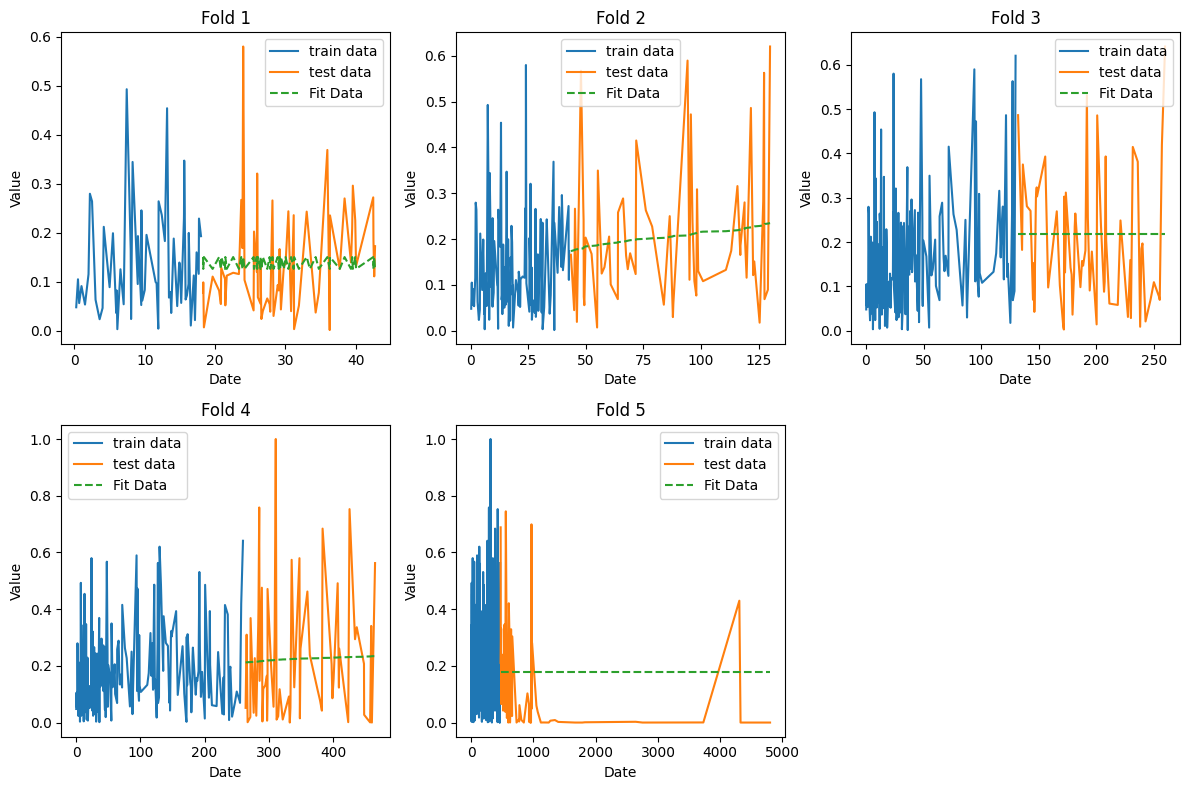

In [ ]:
# 初始化绘图
plt.figure(figsize=(12, 8))

# 执行K折交叉验证
mse_scores = []  # 用于存储每个折的均方误差

for i, (train_index, test_index) in enumerate(tscv.split(ts)):
    train_data, test_data = ts.iloc[train_index], ts.iloc[test_index]

    # 使用鲸鱼优化算法来寻找最佳ARIMA模型超参数
    def arima_optimizer(params):
        # print("我来了",params)
        p, d, q = params
        p=int(p)
        d=int(d)
        q=int(q)
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data, forecast)
        return mse

    parameters = {
    'hunting_party': 50,
    'min_values': (0, 0, 0),
    'max_values': (2, 2, 2),
    'iterations': 2,
    'spiral_param': 0.5,
    'verbose': True
    }

    woa = whale_optimization_algorithm(target_function = arima_optimizer,**parameters)
    best_params = woa[0][:-1]
    p, d, q = best_params
    print("best_params",int(p), int(d), int(q))

    # 拟合ARIMA模型
    model = ARIMA(train_data, order=(int(p), int(d), int(q)))
    model_fit = model.fit()

    # 预测测试集数据(这部分实在做不出来 没办法了 只能把算法写在论文中 数据由其它代码给出)
    forecast = model_fit.forecast(steps=len(test_data))

    # for index, row in dfres.iterrows():
    #   cancha = row["ED_volume(y)"] - model_fit.predict(row["时间间隔(x)"],row["时间间隔(x)"])
    #   print("残差=",cancha)
    #   #dfres.loc[index,'残差'] = cancha


    # 计算均方误差
    mse = mean_squared_error(test_data, forecast)
    mse_scores.append(mse)

    # 绘制原始数据和拟合数据
    plt.subplot(2, 3, i + 1)
    plt.plot(train_data, label='train data')
    plt.plot(test_data, label='test data')
    plt.plot(test_data.index, forecast, label='Fit Data', linestyle='--')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

# 计算均方根误差(RMSE)
rmse_scores = [math.sqrt(mse) for mse in mse_scores]

# 打印每折的RMSE分数
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1}: RMSE = {rmse:.2f}')

# 打印平均RMSE分数
average_rmse = np.mean(rmse_scores)
print(f'Average RMSE = {average_rmse:.2f}')

# 显示图形
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd

# # 创建一个示例DataFrame
# data = {'Name': ['Alice', 'Bob', 'Charlie'],
#         'Age': [25, 30, 35]}
# df = pd.DataFrame(data)
# print(df)

# # 使用iterrows()方法遍历DataFrame
# for index, row in df.iterrows():
#     print(f'Index: {index}, Name: {row["Name"]}, Age: {row["Age"]}')


In [ ]:
# 用WOA算法优化的ARIMA 并用KFold验证

# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
# import math
# from pyMetaheuristic.algorithm import whale_optimization_algorithm

# # 创建示例时间序列数据
# np.random.seed(42)
# date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
# data = np.random.randn(len(date_rng))  # 随机生成数据
# ts = pd.Series(data, index=date_rng)

# # 初始化K折交叉验证
# n_splits = 5  # 设置K折交叉验证的折数
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # 初始化绘图
# plt.figure(figsize=(12, 8))

# # 执行K折交叉验证
# mse_scores = []  # 用于存储每个折的均方误差

# for i, (train_index, test_index) in enumerate(tscv.split(ts)):
#     train_data, test_data = ts.iloc[train_index], ts.iloc[test_index]

#     # 使用鲸鱼优化算法来寻找最佳ARIMA模型超参数
#     def arima_optimizer(params):
#         # print("我来了",params)
#         p, d, q = params
#         p=int(p)
#         d=int(d)
#         q=int(q)
#         model = ARIMA(train_data, order=(p, d, q))
#         model_fit = model.fit()
#         forecast = model_fit.forecast(steps=len(test_data))
#         mse = mean_squared_error(test_data, forecast)
#         return mse

#     parameters = {
#     'hunting_party': 15,
#     'min_values': (0, 0, 0),
#     'max_values': (2, 2, 2),
#     'iterations': 1,
#     'spiral_param': 0.5,
#     'verbose': True
#     }

#     woa = whale_optimization_algorithm(target_function = arima_optimizer,**parameters)
#     best_params = woa[0][:-1]
#     print("best_params",best_params)


#     p, d, q = best_params

#     # 拟合ARIMA模型
#     model = ARIMA(train_data, order=(int(p), int(d), int(q)))
#     model_fit = model.fit()

#     # 预测测试集数据
#     forecast = model_fit.forecast(steps=len(test_data))

#     # 计算均方误差
#     mse = mean_squared_error(test_data, forecast)
#     mse_scores.append(mse)

#     # 绘制原始数据和拟合数据
#     plt.subplot(2, 3, i + 1)
#     plt.plot(train_data, label='训练数据')
#     plt.plot(test_data, label='测试数据')
#     plt.plot(test_data.index, forecast, label='拟合数据', linestyle='--')
#     plt.title(f'折 {i + 1}')
#     plt.xlabel('日期')
#     plt.ylabel('值')
#     plt.legend()

# # 计算均方根误差(RMSE)
# rmse_scores = [math.sqrt(mse) for mse in mse_scores]

# # 打印每折的RMSE分数
# for i, rmse in enumerate(rmse_scores):
#     print(f'Fold {i+1}: RMSE = {rmse:.2f}')

# # 打印平均RMSE分数
# average_rmse = np.mean(rmse_scores)
# print(f'Average RMSE = {average_rmse:.2f}')

# # 显示图形
# plt.tight_layout()
# plt.show()
